In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
from sklearn import naive_bayes
from sklearn import svm
from tqdm import tqdm

In [43]:
data = pd.read_csv('file:///Users/chrismembrey/Desktop/EDA_complete-Copy1.csv', lineterminator = '\n')

In [44]:
data.head()

,Unnamed: 0,tmdb_id,imdb_id,title,revenue,budget,genres,release_date,runtime,tmdb_vote_average,...,COMPOSER_Mitch Lee,COMPOSER_Robert Glasper,COMPOSER_Iván Wyszogrod,COMPOSER_Radwimps,COMPOSER_Peter Venne,original_language_bins,profit?,from_collection,blurb_objectivity,blurb_polarity
0,0,8095.0,tt0056937,Cleopatra,71000000,44000000.0,"['Drama', 'History', 'Romance']",1963-06-12,248.0,7.0,...,NaN,NaN,NaN,NaN,NaN,English,1,0,0.903075,0.000992
1,1,20367.0,tt0037638,Detour,16172,30000.0,"['Crime', 'Drama']",1945-11-30,67.0,7.2,...,NaN,NaN,NaN,NaN,NaN,English,0,0,0.898970,0.012065
2,2,11620.0,tt0043949,Quo Vadis,101486,7623000.0,"['Drama', 'History', 'Romance']",1951-11-08,171.0,7.0,...,NaN,NaN,NaN,NaN,NaN,English,0,0,0.814066,-0.071299
3,3,10865.0,tt0230011,Atlantis: The Lost Empire,186053725,120000000.0,"['Animation', 'Family', 'Adventure', 'Science ...",2001-06-02,95.0,6.9,...,NaN,NaN,NaN,NaN,NaN,English,1,1,0.925194,0.005663
4,4,11313.0,tt0252501,Hearts in Atlantis,24185781,31000000.0,"['Drama', 'Mystery']",2001-09-07,101.0,6.5,...,NaN,NaN,NaN,NaN,NaN,English,0,0,0.836830,-0.043080


<h3> check the variables </h3>

In [45]:
data[[x for x in data.columns if ('Director' not in x) and ('ACTOR' not in x) 
      and ('COMPOSER' not in x) and ('BLURB' not in x) and ('GENRE' not in x)]].columns

Index(['Unnamed: 0', 'tmdb_id', 'imdb_id', 'title', 'revenue', 'budget',
       'genres', 'release_date', 'runtime', 'tmdb_vote_average',
       'tmdb_vote_count', 'spoken_languages', 'production_countries', 'blurb',
       'actors', 'directors', 'composer', 'ROI', 'month', 'day', 'year',
       'inf_budget', 'blurb_length', 'genre_pair_unique', 'Unnamed: 13307',
       'nan', 'original_language_bins', 'profit?', 'from_collection',
       'blurb_objectivity', 'blurb_polarity'],
      dtype='object')

In [46]:
data.shape

(9537, 22035)

<h3> Some null values still require changing </h3> (espacially for dummified columns)

In [47]:
data[[x for x in data.columns if 'Director' in x]] = data[[x for x in data.columns if 'Director' in x]].replace(np.nan,0)

In [48]:
data[[x for x in data.columns if 'Director' in x]]

,Director_Joseph L. Mankiewicz,Director_Edgar G. Ulmer,Director_Scott R. Beal,Director_Kenneth W. Richardson,Director_Gary Trousdale,Director_Kirk Wise,Director_Scott Hicks,Director_Robert J. Fraser,Director_Mark Rosman,Director_Darrin Brown,...,Director_Owen Egerton,Director_Salvador Simó,Director_Gene Stupnitsky,Director_Ben Hernandez Bray,Director_Marcelo Martinessi,Director_Alex Kendrick,Director_Diego Kaplan,Director_Martin J Pickering,Director_Makoto Shinkai,Director_Rémi St-Michel
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
data[[x for x in data.columns if 'COMPOSER' in x]] = data[[x for x in data.columns if 'COMPOSER' in x]].replace(np.nan,0)

In [50]:
data[[x for x in data.columns if 'COMPOSER' in x]]

,COMPOSER_Alex North,COMPOSER_Leo Erdody,COMPOSER_Miklós Rózsa,COMPOSER_James Newton Howard,COMPOSER_Mychael Danna,COMPOSER_Patrick Doyle,COMPOSER_Christophe Beck,COMPOSER_Thomas Newman,COMPOSER_Trevor Jones,COMPOSER_Danny Elfman,...,COMPOSER_Tyler Stone,COMPOSER_Marcos Cruz Lloréns,COMPOSER_Marco Fedalto,COMPOSER_Arturo Cardelús,COMPOSER_Matt Novack,COMPOSER_Mitch Lee,COMPOSER_Robert Glasper,COMPOSER_Iván Wyszogrod,COMPOSER_Radwimps,COMPOSER_Peter Venne
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data[[x for x in data.columns if 'ACTOR' in x]] = data[[x for x in data.columns if 'ACTOR' in x]].replace(np.nan,0)

In [52]:
data[[x for x in data.columns if 'ACTOR' in x]] 

,ACTOR_Elizabeth Taylor,ACTOR_Richard Burton,ACTOR_Rex Harrison,ACTOR_Pamela Brown,ACTOR_Hume Cronyn,ACTOR_Andrew Keir,ACTOR_Martin Landau,ACTOR_Roddy McDowall,ACTOR_Robert Stephens,ACTOR_Francesca Annis,...,ACTOR_Samantha Langevin,ACTOR_Cliff De Young,ACTOR_Tommy Tiny Lister,ACTOR_Peter Berg,ACTOR_Fred Thompson,ACTOR_Kenneth Branagh,ACTOR_Hallie Eisenberg,ACTOR_Jay Rodan,ACTOR_Kareena Kapoor,ACTOR_Eriq Ebouaney
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
data['runtime'] = data.runtime.replace(np.nan,np.median(data.runtime[data.runtime.isnull() == False]))

In [54]:
data.blurb_length = data.blurb_length.replace(np.nan,np.median(data.blurb_length[data.blurb_length.isnull() == False]))

In [55]:
data.isnull().sum().to_frame()[data.isnull().sum().to_frame().iloc[:,0] > 0]

,0
tmdb_id,1546
imdb_id,28
genres,23
spoken_languages,41
production_countries,125
blurb,24
actors,18
composer,605
Unnamed: 13307,9294
nan,9534


<h3> Variables that will be used to look at ROI </h3>

In [56]:
data.drop(['Unnamed: 0', 'tmdb_id', 'imdb_id', 'title', 'revenue', 'budget',
       'genres', 'release_date','tmdb_vote_average',
       'tmdb_vote_count', 'spoken_languages', 'production_countries', 'blurb',
       'actors', 'directors', 'composer', 'year','ROI','Unnamed: 13307',
       'nan'], axis = 1, inplace = True)

In [57]:
df = data.copy()

In [17]:
y = df.pop('profit?')

In [58]:
X = df

In [59]:
X.shape

(9537, 22015)

<b> Baseline </b>

In [26]:
y.value_counts(normalize = True)

1    0.573765
0    0.426235
Name: profit?, dtype: float64

<h1>Preprocessing</h1>

<b> dummies for day, month , original_language_bins </b>

In [60]:
#dont drop first on any as we want to see how each variable affects ROI
X = pd.get_dummies(X, columns = ['day', 'month','original_language_bins'], dummy_na = True, drop_first = True)

In [61]:
X.shape

(9537, 22038)

<b> Train Test Split </b>

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

In [32]:
x_train = pd.DataFrame(x_train ,columns = X.columns)
x_test = pd.DataFrame(x_test ,columns = X.columns)

<b>Standard Scaler on the Variables that are not binary/catagorical</b>

I'm just going to scale the continuous features to be able to retain explainability of the binary variables

In [33]:
scaler = StandardScaler()
scaler_columns = ['runtime', 'inf_budget', 'blurb_length','blurb_objectivity', 'blurb_polarity']

In [34]:
scale_transformer = ColumnTransformer([('scaler',scaler,scaler_columns)], remainder = 'passthrough', sparse_threshold = 0)

The function below will allow us to view the column headers after transformation

In [39]:
import warnings
import sklearn
import pandas as pd



def get_feature_names(column_transformer):
    """Get feature names from all transformers.
    Returns
    -------
    feature_names : list of strings
        Names of the features produced by transform.
    """
    # Remove the internal helper function
    #check_is_fitted(column_transformer)
    
    # Turn loopkup into function for better handling with pipeline later
    def get_names(trans):
        # >> Original get_feature_names() method
        if trans == 'drop' or (
                hasattr(column, '__len__') and not len(column)):
            return []
        if trans == 'passthrough':
            if hasattr(column_transformer, '_df_columns'):
                if ((not isinstance(column, slice))
                        and all(isinstance(col, str) for col in column)):
                    return column
                else:
                    return column_transformer._df_columns[column]
            else:
                indices = np.arange(column_transformer._n_features)
                return ['x%d' % i for i in indices[column]]
        if not hasattr(trans, 'get_feature_names'):
        # >>> Change: Return input column names if no method avaiable
            # Turn error into a warning
            warnings.warn("Transformer %s (type %s) does not "
                                 "provide get_feature_names. "
                                 "Will return input column names if available"
                                 % (str(name), type(trans).__name__))
            # For transformers without a get_features_names method, use the input
            # names to the column transformer
            if column is None:
                return []
            else:
                return [name + "__" + f for f in column]

        return [name + "__" + f for f in trans.get_feature_names()]
    
    ### Start of processing
    feature_names = []
    
    # Allow transformers to be pipelines. Pipeline steps are named differently, so preprocessing is needed
    if type(column_transformer) == sklearn.pipeline.Pipeline:
        l_transformers = [(name, trans, None, None) for step, name, trans in column_transformer._iter()]
    else:
        # For column transformers, follow the original method
        l_transformers = list(column_transformer._iter(fitted=True))
    
    
    for name, trans, column, _ in l_transformers: 
        if type(trans) == sklearn.pipeline.Pipeline:
            # Recursive call on pipeline
            _names = get_feature_names(trans)
            # if pipeline has no transformer that returns names
            if len(_names)==0:
                _names = [name + "__" + f for f in column]
            feature_names.extend(_names)
        else:
            feature_names.extend(get_names(trans))
    
    return feature_names


Transform the continuous variables so that they are standardised and therefore comparable

In [36]:
x_train_trans = pd.DataFrame(scale_transformer.fit_transform(x_train), columns = get_feature_names(scale_transformer))

x_test_trans = pd.DataFrame(scale_transformer.transform(x_test), columns = get_feature_names(scale_transformer))

<ipython-input-35-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-35-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [36]:
x_test_trans

,scaler__runtime,scaler__inf_budget,scaler__blurb_length,scaler__blurb_objectivity,scaler__blurb_polarity,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,GENRE_Animation,...,month_12.0,month_nan,original_language_bins_English,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,0.042238,-0.534443,0.849676,0.860445,0.745288,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.056282,-0.359368,-1.095240,-0.310518,-0.983409,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.323935,-0.365561,-0.637613,2.148567,0.178041,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.095077,0.095330,-0.370664,-0.586166,0.158416,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.788537,2.374095,-0.256257,-0.394403,0.539121,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,-1.147825,-0.266111,-0.065579,0.146934,-0.925254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,-0.049305,0.075587,0.086964,-0.221283,0.117278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1905,-0.186620,-0.174501,-0.523206,-2.116619,0.412392,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.042238,0.007394,-0.904562,-0.029125,-2.571222,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h1> Logistic Regression </h1>

In [37]:
#create the model object
log_model = LogisticRegression()

In [38]:
#investigate parameters
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [39]:
#confirm the parameters to iterate through
log_model_params = {'C': np.logspace(-4,4,15),
                   'l1_ratio': np.linspace(0,1,15),
                   'penalty': ['elasticnet'],
                   'solver':['saga']}


#create the grid search cv object
log_model_grid = GridSearchCV(log_model, log_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
log_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             verbose=1)

<b> Resulting scores </b>

In [40]:
#the best estimator
log_model_grid.best_estimator_

LogisticRegression(C=51.79474679231202, l1_ratio=0.21428571428571427,
                   penalty='elasticnet', solver='saga')

In [41]:
#training score cross validated
log_model_grid.best_score_

0.6645713426293965

In [42]:
#test score
log_model_grid.score(x_test_trans,y_test)

0.6698113207547169

In [43]:
log_model_grid_results = []

log_model_grid_results.append(log_model_grid.best_score_)
log_model_grid_results.append(log_model_grid.score(x_test_trans,y_test))


print(f'Training Accuracy: {log_model_grid.best_score_}')
print(f'Testing Accuracy: {log_model_grid.score(x_test_trans,y_test)}')

Training Accuracy: 0.6645713426293965
Testing Accuracy: 0.6698113207547169


<b>feature importance</b>

In [44]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': log_model_grid.best_estimator_.coef_[0]})
coefs

,Feature,coef
0,scaler__runtime,0.310053
1,scaler__inf_budget,-0.045478
2,scaler__blurb_length,-0.001499
3,scaler__blurb_objectivity,-0.005610
4,scaler__blurb_polarity,0.033267
...,...,...
22033,original_language_bins_Hindi,0.136348
22034,original_language_bins_No Language,0.464714
22035,original_language_bins_Other,-0.124403
22036,original_language_bins_Spanish,0.033802


In [45]:
coefs['abs'] = abs(coefs.coef)

In [46]:
coefs.sort_values(by = 'abs' , ascending = False).head(10)

,Feature,coef,abs
22010,from_collection,1.733156,1.733156
290,ACTOR_Tom Cruise,0.901312,0.901312
2093,ACTOR_Sam Elliott,0.799296,0.799296
18465,COMPOSER_Thomas Newman,0.768347,0.768347
1758,ACTOR_Tom Hanks,0.767421,0.767421
5447,ACTOR_Clint Eastwood,0.738228,0.738228
1561,ACTOR_George Clooney,0.731495,0.731495
11435,ACTOR_Steve James,0.715897,0.715897
18515,COMPOSER_James Horner,0.691367,0.691367
2750,ACTOR_Fisher Stevens,-0.674761,0.674761


<h2> Decision Tree Classifier <h2>

In [189]:
#create the model object
dtree_model = DecisionTreeClassifier()

In [190]:
#investigate parameters
dtree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [191]:
#confirm the parameters to iterate through
dtree_model_params = {'criterion':['gini'],
                   'max_depth':[x for x in range(3,16)],
                   'ccp_alpha': np.logspace(-4,4,10)}


#create the grid search cv object
dtree_model_grid = GridSearchCV(dtree_model, dtree_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
dtree_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 130 candidates, totalling 650 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'ccp_alpha': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'criterion': ['gini'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15]},
             verbose=1)

<b> Resulting scores </b>

In [192]:
#the best estimator
dtree_model_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.000774263682681127, max_depth=8)

In [193]:
#training score cross validated
dtree_model_grid.best_score_

0.6307519498098533

In [194]:
#test score
dtree_model_grid.score(x_test_trans,y_test)

0.6090146750524109

In [195]:
dtree_model_grid_results = []

dtree_model_grid_results.append(dtree_model_grid.best_score_)
dtree_model_grid_results.append(dtree_model_grid.score(x_test_trans,y_test))


print(f'Training Accuracy: {dtree_model_grid.best_score_}')
print(f'Testing Accuracy: {dtree_model_grid.score(x_test_trans,y_test)}')

Training Accuracy: 0.6307519498098533
Testing Accuracy: 0.6090146750524109


<b>feature importance</b>

In [196]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': dtree_model_grid.best_estimator_.feature_importances_})
coefs

,Feature,coef
0,scaler__runtime,0.170144
1,scaler__inf_budget,0.148374
2,scaler__blurb_length,0.043127
3,scaler__blurb_objectivity,0.029015
4,scaler__blurb_polarity,0.000000
...,...,...
22033,original_language_bins_Hindi,0.000000
22034,original_language_bins_No Language,0.000000
22035,original_language_bins_Other,0.000000
22036,original_language_bins_Spanish,0.000000


In [197]:
coefs['abs'] = abs(coefs.coef)

In [198]:
coefs.sort_values(by = 'abs' , ascending = False).head(10)

,Feature,coef,abs
22010,from_collection,0.520851,0.520851
0,scaler__runtime,0.170144,0.170144
1,scaler__inf_budget,0.148374,0.148374
2,scaler__blurb_length,0.043127,0.043127
3,scaler__blurb_objectivity,0.029015,0.029015
5,GENRE_Drama,0.021802,0.021802
7,GENRE_Romance,0.021131,0.021131
25,GENRE_Biography,0.020189,0.020189
28,genre_pair_unique,0.014217,0.014217
2931,ACTOR_Meryl Streep,0.011151,0.011151


<h2> XGBoost Classifier <h2>

In [222]:
#create the model object
boost_model = XGBClassifier()

In [223]:
#investigate parameters
boost_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [ ]:
#confirm the parameters to iterate through
boost_model_params = {'booster': ['gbtree', 'gblinear'],
                     'reg_alpha': np.logspace(-4,4,15),
                    'learning_rate': [0.1],
                     'max_depth': [x for x in range(6,16)]}


#essentially fitting a normal model with a cross validation rather than a grid search
boost_model_grid = GridSearchCV(boost_model, boost_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
boost_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


<b> Resulting scores </b>

In [202]:
#the best estimator
boost_model_grid.best_estimator_

GaussianNB()

In [203]:
#training score cross validated
boost_model_grid.best_score_

0.6318021614421073

In [204]:
#test score
test_score = boost_model_grid.score(x_test_trans,y_test)

0.6111111111111112

In [205]:
boost_model_grid_results = []

boost_model_grid_results.append(naive_model_grid.best_score_)
boost_model_grid_results.append(naive_model_grid.score(x_test_trans,y_test))


print(f'Training Accuracy: {naive_model_grid.best_score_}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.6318021614421073
Testing Accuracy: 0.6111111111111112


<b>feature importance</b>

In [207]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': svm_model_grid.best_estimator_.coef_[0]})
coefs

In [ ]:
coefs['abs'] = abs(coefs.coef)

In [ ]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)y

<h2> Support Vector Machine <h2>

In [208]:
#create the model object
svm_model = svm.SVC()

In [209]:
#investigate parameters
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [211]:
#confirm the parameters to iterate through
svm_model_params = {'C':np.logspace(-4,4,10),
                   'kernel':['linear']}


#create the grid search cv object
svm_model_grid = GridSearchCV(svm_model, svm_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
svm_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/chrismembrey/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=SVC(), n_jobs=3,
             param_grid={'C': array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04]),
                         'kernel': ['linear']},
             verbose=1)

<b> Resulting scores </b>

In [212]:
#the best estimator
svm_model_grid.best_estimator_

SVC(C=0.046415888336127774, kernel='linear')

In [213]:
#training score cross validated
svm_model_grid.best_score_

0.6639156049244784

In [215]:
#test score
test_score = svm_model_grid.score(x_test_trans,y_test)

In [216]:
svm_model_grid_results = []

svm_model_grid_results.append(svm_model_grid.best_score_)
svm_model_grid_results.append(test_score)


print(f'Training Accuracy: {svm_model_grid.best_score_}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.6639156049244784
Testing Accuracy: 0.6771488469601677


<b>feature importance</b>

In [217]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                     'coef': svm_model_grid.best_estimator_.coef_[0]})
coefs

,Feature,coef
0,scaler__runtime,0.307323
1,scaler__inf_budget,-0.020912
2,scaler__blurb_length,0.015294
3,scaler__blurb_objectivity,-0.007034
4,scaler__blurb_polarity,0.005626
...,...,...
22033,original_language_bins_Hindi,0.160506
22034,original_language_bins_No Language,0.320426
22035,original_language_bins_Other,-0.026969
22036,original_language_bins_Spanish,0.034609


In [218]:
coefs['abs'] = abs(coefs.coef)

In [219]:
coefs.sort_values(by = 'abs' , ascending = False).head(5)

,Feature,coef,abs
22010,from_collection,1.015350,1.015350
18409,BLURB_school,0.477692,0.477692
2093,ACTOR_Sam Elliott,0.401691,0.401691
290,ACTOR_Tom Cruise,0.393662,0.393662
22031,original_language_bins_French,-0.391075,0.391075


From collection has again been the top variable here, what is the correlation between making a profit and being from a collection of sequels?

In [5]:
data[['from_collection', 'profit?']].corr()

,from_collection,profit?
from_collection,1.000000,0.269086
profit?,0.269086,1.000000


<h1> Model Evaluation for the Best Model: Logistic Regression </h1>

The model for predicting profits has a score which performs above randomly guessing (baseline), but which class is the model better at predicting?

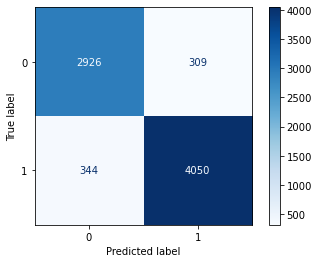

In [49]:
from sklearn.metrics import classification_report, plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve

plot_confusion_matrix(log_model_grid.best_estimator_ , x_train_trans , y_train , cmap = 'Blues')

In [59]:
predictions = log_model_grid.best_estimator_.predict(x_test_trans)

In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       830
           1       0.71      0.71      0.71      1078

    accuracy                           0.67      1908
   macro avg       0.66      0.66      0.66      1908
weighted avg       0.67      0.67      0.67      1908



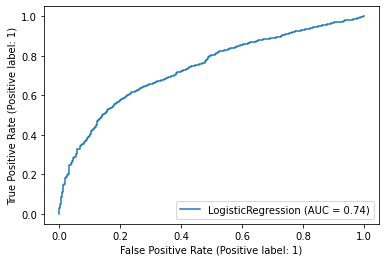

In [61]:
plot_roc_curve(log_model_grid.best_estimator_ , x_test_trans , y_test);

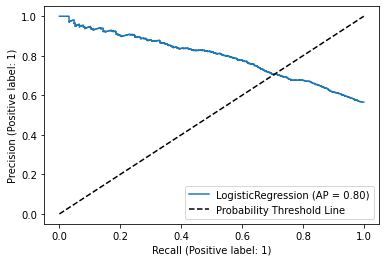

In [76]:
import matplotlib.pyplot as plt
plot_precision_recall_curve(log_model_grid.best_estimator_ , x_test_trans , y_test);
plt.plot([0,1], [0,1], color = 'black', label = 'Probability Threshold Line', linestyle = '--');
plt.legend();

<h1> Multiclass Classification of Target Variable </h1> 

In [102]:
X.head()

,runtime,ROI,inf_budget,blurb_length,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,GENRE_Animation,GENRE_Family,...,month_11.0,month_12.0,month_nan,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,248.0,61.363636,3.781901e+08,37.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,67.0,-46.093333,4.359348e+05,56.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,171.0,-98.668687,7.594529e+07,68.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,95.0,55.044771,1.773128e+08,52.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,101.0,-21.981352,4.572874e+07,14.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
y = data.ROI.copy()
y.head()

0    61.363636
1   -46.093333
2   -98.668687
3    55.044771
4   -21.981352
Name: ROI, dtype: float64

In [104]:
#quantiles
y.quantile([0, .20, .40, .60, .80 , 1.0])

0.0     -99.970951
0.2     -76.373582
0.4      -9.377520
0.6      95.281187
0.8     291.219144
1.0    2508.150985
Name: ROI, dtype: float64

In [105]:
target_multi = pd.qcut(y , [0, .20, .40, .60, .80 , 1.0], [0, 1, 2, 
                                                           3, 4])
target_multi.head()

0    2
1    1
2    0
3    2
4    1
Name: ROI, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

<b> Baseline </b>

In [106]:
target_multi.value_counts(normalize = True)

0    0.200063
4    0.200063
1    0.199958
2    0.199958
3    0.199958
Name: ROI, dtype: float64

<h1>Preprocessing</h1>

In [107]:
X.shape

(9537, 22038)

In [108]:
X.drop('ROI', inplace = True , axis = 1)

<b> Train Test Split </b>

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, target_multi, test_size = 0.2, random_state = 1, stratify = target_multi)

In [110]:
x_train = pd.DataFrame(x_train ,columns = X.columns)
x_test = pd.DataFrame(x_test ,columns = X.columns)

<b>Standard Scaler on the Variables that are not binary/catagorical</b>

I'm just going to scale the continuous features to be able to retain explainability of the binary variables

In [111]:
scaler = StandardScaler()
scaler_columns = ['runtime', 'inf_budget', 'blurb_length','blurb_objectivity', 'blurb_polarity']

In [112]:
scale_transformer = ColumnTransformer([('scaler',scaler,scaler_columns)], remainder = 'passthrough', sparse_threshold = 0)

Transform the continuous variables so that they are standardised and therefore comparable

In [113]:
x_train_trans = pd.DataFrame(scale_transformer.fit_transform(x_train), columns = get_feature_names(scale_transformer))

x_test_trans = pd.DataFrame(scale_transformer.transform(x_test), columns = get_feature_names(scale_transformer))

<ipython-input-39-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "
<ipython-input-39-fb4ebcbce952>:36: UserWarning: Transformer scaler (type StandardScaler) does not provide get_feature_names. Will return input column names if available
  warnings.warn("Transformer %s (type %s) does not "


In [114]:
x_test_trans

,scaler__runtime,scaler__inf_budget,scaler__blurb_length,scaler__blurb_objectivity,scaler__blurb_polarity,GENRE_Drama,GENRE_History,GENRE_Romance,GENRE_Crime,GENRE_Animation,...,month_11.0,month_12.0,month_nan,original_language_bins_French,original_language_bins_German,original_language_bins_Hindi,original_language_bins_No Language,original_language_bins_Other,original_language_bins_Spanish,original_language_bins_nan
0,0.042238,-0.534443,0.849676,0.860445,0.745288,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.056282,-0.359368,-1.095240,-0.310518,-0.983409,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.323935,-0.365561,-0.637613,2.148567,0.178041,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.095077,0.095330,-0.370664,-0.586166,0.158416,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.788537,2.374095,-0.256257,-0.394403,0.539121,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,-1.147825,-0.266111,-0.065579,0.146934,-0.925254,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,-0.049305,0.075587,0.086964,-0.221283,0.117278,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1905,-0.186620,-0.174501,-0.523206,-2.116619,0.412392,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.042238,0.007394,-0.904562,-0.029125,-2.571222,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<h1> Logistic Regression </b>

In [115]:
#create the model object for the 'one over rest' logistic regression
log_model = LogisticRegression(multi_class = 'ovr')

In [116]:
#investigate parameters
log_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [117]:
#confirm the parameters to iterate through
log_model_params = {'C': np.logspace(-4,4,15),
                   'l1_ratio': np.linspace(0,1,15),
                   'penalty': ['elasticnet'],
                   'solver':['saga']}


#create the grid search cv object
log_model_grid = GridSearchCV(log_model, log_model_params,
                              verbose = 1,
                              cv = 5,
                              n_jobs = 3)
log_model_grid.fit(x_train_trans,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=LogisticRegression(multi_class='ovr'), n_jobs=3,
             param_grid={'C': array([1.00000000e-04, 3.72759372e-04, 1.38949549e-03, 5.17947468e-03,
       1.93069773e-02, 7.19685673e-02, 2.68269580e-01, 1.00000000e+00,
       3.72759372e+00, 1.38949549e+01, 5.17947468e+01, 1.93069773e+02,
       7.19685673e+02, 2.68269580e+03, 1.00000000e+04]),
                         'l1_ratio': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ]),
                         'penalty': ['elasticnet'], 'solver': ['saga']},
             verbose=1)

<b> Resulting scores </b>

In [119]:
#the best estimator
log_model_grid.best_estimator_

LogisticRegression(C=0.019306977288832496, l1_ratio=0.0, multi_class='ovr',
                   penalty='elasticnet', solver='saga')

In [120]:
#training score cross validated
log_model_grid.best_score_

0.33293874481662117

In [121]:
#test score
test_score = log_model_grid.score(x_test_trans,y_test)

In [122]:
print(f'Training Accuracy: {log_model_grid.best_score_}')
print(f'Cross Validated Training Accuracy: {np.mean(cross_val_score(log_model_grid.best_estimator_ , x_train_trans , y_train, cv =5))}')
print(f'Testing Accuracy: {test_score}')

Training Accuracy: 0.33293874481662117
Cross Validated Training Accuracy: 0.3328076832176697
Testing Accuracy: 0.34591194968553457


<b> Baseline Scores </b>

In [123]:
target_multi.value_counts(normalize = True)

0    0.200063
4    0.200063
1    0.199958
2    0.199958
3    0.199958
Name: ROI, dtype: float64

<b>feature importance</b>

In [124]:
log_model_grid.best_estimator_.coef_

array([[-0.25173431, -0.50670464, -0.0659241 , ...,  0.0496229 ,
        -0.03763887,  0.        ],
       [-0.15467746,  0.04703023,  0.00214929, ..., -0.08396614,
        -0.01651136,  0.        ],
       [ 0.0279103 ,  0.1205459 ,  0.00324029, ...,  0.03627403,
         0.0211354 ,  0.        ],
       [ 0.12440215,  0.16923625,  0.06368171, ...,  0.03138962,
         0.07164088,  0.        ],
       [ 0.24228842, -0.24873566,  0.00509663, ..., -0.06305415,
        -0.04620026,  0.        ]])

In [125]:
coefs = pd.DataFrame({'Feature': x_train_trans.columns,
                    'coef_0': log_model_grid.best_estimator_.coef_[0],
                     'coef_1': log_model_grid.best_estimator_.coef_[1],
                     'coef_2': log_model_grid.best_estimator_.coef_[2],
                     'coef_3': log_model_grid.best_estimator_.coef_[3],
                     'coef_4': log_model_grid.best_estimator_.coef_[4]})
coefs

,Feature,coef_0,coef_1,coef_2,coef_3,coef_4
0,scaler__runtime,-0.251734,-0.154677,0.027910,0.124402,0.242288
1,scaler__inf_budget,-0.506705,0.047030,0.120546,0.169236,-0.248736
2,scaler__blurb_length,-0.065924,0.002149,0.003240,0.063682,0.005097
3,scaler__blurb_objectivity,0.039814,-0.036851,0.043775,-0.041537,-0.005774
4,scaler__blurb_polarity,-0.057298,0.016961,0.057992,0.013758,-0.030874
...,...,...,...,...,...,...
22032,original_language_bins_Hindi,-0.003843,-0.032142,0.149690,0.034164,-0.160303
22033,original_language_bins_No Language,-0.146452,-0.043823,-0.020247,-0.012449,0.189684
22034,original_language_bins_Other,0.049623,-0.083966,0.036274,0.031390,-0.063054
22035,original_language_bins_Spanish,-0.037639,-0.016511,0.021135,0.071641,-0.046200


In [126]:
for x in coefs.columns:
    if 'coef' in x:
        coefs[f'abs_{x[-1]}'] = abs(coefs[x])

In [127]:
coefs.sort_values(by = 'abs_0' , ascending = False).head(10)

,Feature,coef_0,coef_1,coef_2,coef_3,coef_4,abs_0,abs_1,abs_2,abs_3,abs_4
22010,from_collection,-0.822825,-0.784398,-0.268492,0.343658,1.072554,0.822825,0.784398,0.268492,0.343658,1.072554
1,scaler__inf_budget,-0.506705,0.047030,0.120546,0.169236,-0.248736,0.506705,0.047030,0.120546,0.169236,0.248736
28,genre_pair_unique,0.378569,0.089361,-0.100479,-0.111287,-0.250980,0.378569,0.089361,0.100479,0.111287,0.250980
5,GENRE_Drama,0.368962,0.050660,-0.065874,-0.164067,-0.185310,0.368962,0.050660,0.065874,0.164067,0.185310
0,scaler__runtime,-0.251734,-0.154677,0.027910,0.124402,0.242288,0.251734,0.154677,0.027910,0.124402,0.242288
10,GENRE_Family,-0.244348,-0.130578,0.132481,0.213127,0.030248,0.244348,0.130578,0.132481,0.213127,0.030248
22030,original_language_bins_French,0.237135,0.081110,-0.060345,-0.085532,-0.196151,0.237135,0.081110,0.060345,0.085532,0.196151
18381,BLURB_story,0.203353,-0.057980,-0.050902,-0.127946,0.011467,0.203353,0.057980,0.050902,0.127946,0.011467
18409,BLURB_school,-0.190623,-0.046299,0.032826,0.072264,0.122848,0.190623,0.046299,0.032826,0.072264,0.122848
18405,BLURB_group,0.190261,-0.133269,-0.000872,-0.050904,-0.001720,0.190261,0.133269,0.000872,0.050904,0.001720


<b> Intercept </b>

In [87]:
log_model_grid.best_estimator_.intercept_

array([-0.00540992, -0.00569137, -0.00398391, -0.05976534, -0.08988234])

<h1> Model Evaluation for the Multiclass Classification Model: Logistic Regression </h1>

The model for predicting profits has a score which performs above randomly guessing (baseline), but which class is the model better at predicting?

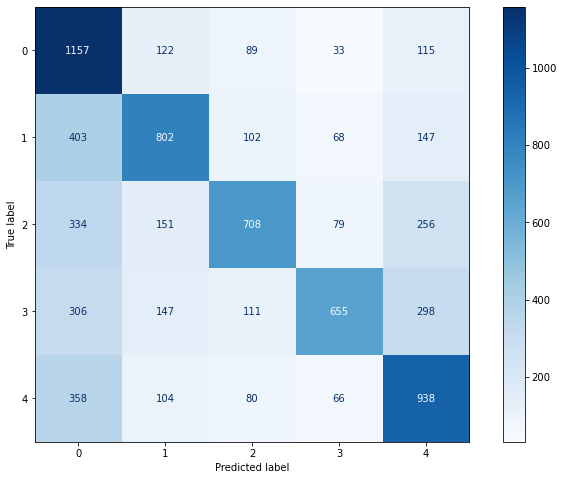

In [190]:
from sklearn import metrics
fig, ax = plt.subplots(figsize=(12,8))
metrics.plot_confusion_matrix(log_model_grid.best_estimator_ , x_train_trans , y_train , cmap = 'Blues', ax = ax);

In [177]:
import scikitplot as skplt

In [192]:
predictions = log_model_grid.best_estimator_.predict(x_train_trans)

In [193]:
predict_proba = log_model_grid.best_estimator_.predict_proba(x_train_trans)

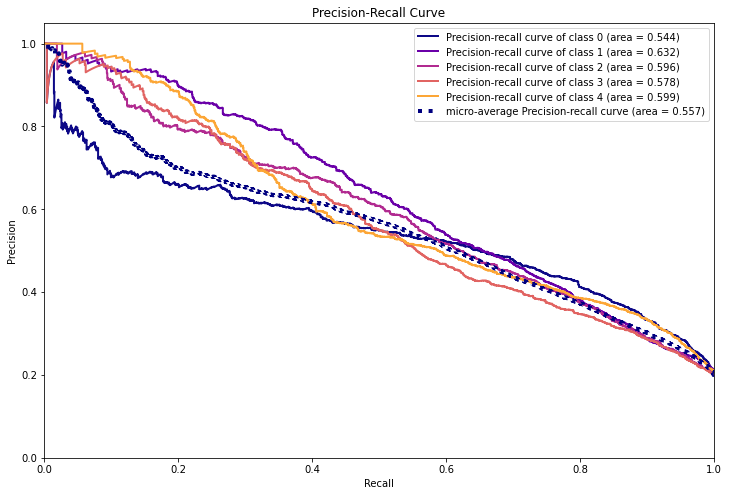

In [197]:
# from  import classification_report, plot_confusion_matrix , plot_roc_curve , plot_precision_recall_curve
fig, ax = plt.subplots(figsize=(12,8))
skplt.metrics.plot_precision_recall( y_train ,predict_proba ,cmap = 'plasma', ax =ax);

In [200]:

print(metrics.classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.45      0.76      0.57      1516
           1       0.60      0.53      0.56      1522
           2       0.65      0.46      0.54      1528
           3       0.73      0.43      0.54      1517
           4       0.53      0.61      0.57      1546

    accuracy                           0.56      7629
   macro avg       0.59      0.56      0.56      7629
weighted avg       0.59      0.56      0.56      7629



From the classification report, we can see the highest precsion score for quintile 3, meaning that the model is best as predicting ROI values between 95-291 with reduced false positives (highlighting more confidence

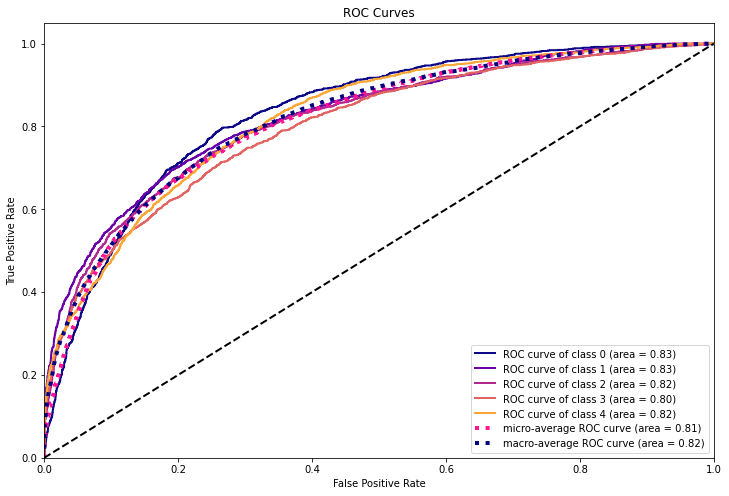

In [201]:
fig, ax = plt.subplots(figsize=(12,8))
skplt.metrics.plot_roc( y_train ,predict_proba ,cmap = 'plasma', ax =ax);


<b> Recap of each groups' ranges <b/>

In [203]:
y.quantile([0,0.2,0.4,0.6,0.8,1])

0.0     -99.970951
0.2     -76.373582
0.4      -9.377520
0.6      95.281187
0.8     291.219144
1.0    2508.150985
Name: ROI, dtype: float64

<b> multi-class result </b>

In a productionised model, we would be looking to see a high accuracy score for films that are in group 3 or 4 (the two highest quintiles). To gain the most accurate results (avoiding false positives), one would increase the probability threshold so that the class in question is only predicted when the model predicts the probability of that clas to be at lest 0.8. This was we can be sure of the prediction for that class. This will reduce recall (increase false negatives) but increase the precision (reduce false positives).

<h1> Visualisation </h1>

In [206]:
train_scores = [0.6645 , 0.6307, 0.6318, 0.6639]

classification_scores = pd.DataFrame({'train_scores': train_scores}, index = ['ElasticNet Logistic Regression', 
                                                                             'Decision Tree Classifier',
                                                                             'Extreme Gradient Boost',
                                                                            'Support Vector Machine (Linear Kernel)'])

In [207]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plasma = cm.get_cmap('rainbow')

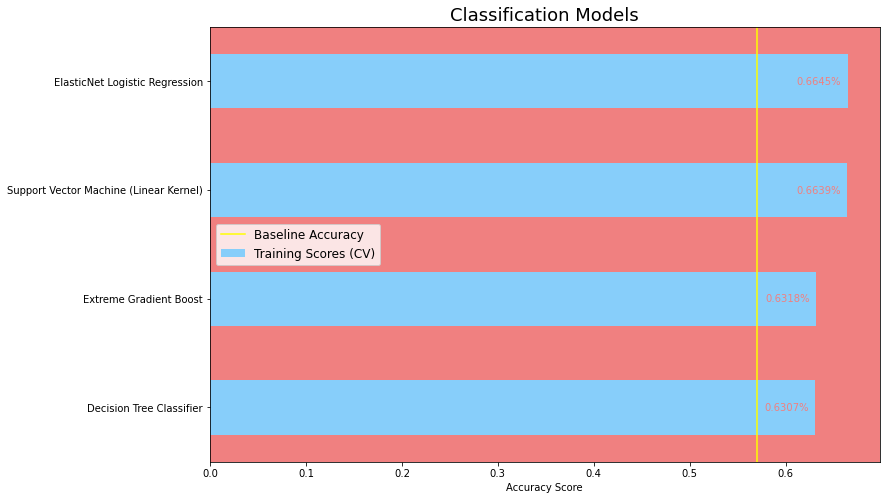

In [215]:

rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))



fig , ax = plt.subplots(figsize = (12,8))
ax = classification_scores.sort_values(by = 'train_scores',ascending = True).plot(kind = 'barh', color = 'lightskyblue', label = 'Training Scores (CV)', ax =ax);
plt.title('Classification Models', fontsize = 18);
ax.set_facecolor('lightcoral')
ax.axvline(0.57, color = 'yellow', label = 'Baseline Accuracy');
ax.set_xlabel('Accuracy Score');
plt.legend(labels = ['Baseline Accuracy', 'Training Scores (CV)'], prop = {'size':12});


rects = ax.patches

# Make some labels.
labels = [f"{i}%" for i in classification_scores.sort_values(by = 'train_scores',ascending = True).train_scores]

for rect, label in zip(rects, labels):
    height = rect.get_width()
    plt.text(rect.get_width()-0.03, rect.get_y()+0.2,label,
            ha='center', va='bottom', color = 'lightcoral');
    

    
    

plt.savefig('Classification_Models_Train_scores.jpeg', format = 'jpeg')

<h1> Conclusion </h1>

Overall, the classification models have shown a similar output to the regression models. Most importantly they have indicated that films which are from a collection are certainly more likely to cause films to have increased ROI compared to other features. Although the model scores were barely above the baseline, this feature was consistenly at the top, thus, we would keep it for future analysis of film ROI. Aside from films in a collection. The next most consisten features affecting film ROI appear to be Tom Cruise, Sam Elliot and Tom Hanks. These actors all had a positive effect on ROI.

Further work can be done by either gaining more variables, such as whether the film is from a best selling book or feature engineer current variables such as the actors so that each actor/directors' popularity can be accounted for.

